<a href="https://colab.research.google.com/github/shanjavas/VideoGame/blob/master/Cyclone_Project_pynb_final_draft_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sparshjain8287","key":"ec7b20617be61dd75d5c92c221b97e06"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d sshubam/insat3d-infrared-raw-cyclone-images-20132021

 95% 41.0M/43.2M [00:03<00:00, 17.9MB/s]
100% 43.2M/43.2M [00:03<00:00, 13.4MB/s]


In [3]:
!unzip /content/insat3d-infrared-raw-cyclone-images-20132021.zip

Archive:  /content/insat3d-infrared-raw-cyclone-images-20132021.zip
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/101.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/102.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/106.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/111.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/112.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/115.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/118.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/119.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/128.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/25.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/27.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/28.jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/30(1).jpeg  
  inflating: insat3d_for_reference_ds/CYCLONE_DATASET/30.jpeg  
  inflating: insat3d_for

##First we visualise the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pd.read_csv("/content/insat_3d_ds - Sheet.csv")

,img_name,label
0,25.jpg,25
1,27.jpg,27
2,28.jpg,28
3,30.jpg,30
4,30(1).jpg,30
...,...,...
131,112.jpg,112
132,115.jpg,115
133,118.jpg,118
134,119.jpg,119


In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/insat3d_ir_cyclone_ds"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in '/content/insat3d_ir_cyclone_ds'.
There are 0 directories and 136 images in '/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'.


In [6]:
os.mkdir("test_data")

In [7]:
import os
import shutil
 
source = '/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED'
destination = '/content/test_data'
 
# gather all files
allfiles = os.listdir(source)
 
# iterate on all files to move them to destination folder
for f in allfiles[133:]:
    
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    shutil.move(src_path, dst_path)
    

In [8]:
#Get the classes drammatically
import pathlib
data_dir=pathlib.Path("/content/insat3d_ir_cyclone_ds")
data_dir

PosixPath('/content/insat3d_ir_cyclone_ds')

In [9]:
#Let visualise our images 
import random
def view_random_image(target_dir):
  target_folder=target_dir
  random_image=random.sample(os.listdir(target_folder),10)
  plt.figure(figsize=(10,10))
  for i in range(10):
    img=mpimg.imread(target_folder+"/"+random_image[i])
    plt.subplot(5,2,i+1)
    plt.imshow(img)
    plt.title(random_image[i])
    plt.axis("off");#Default axis is on 

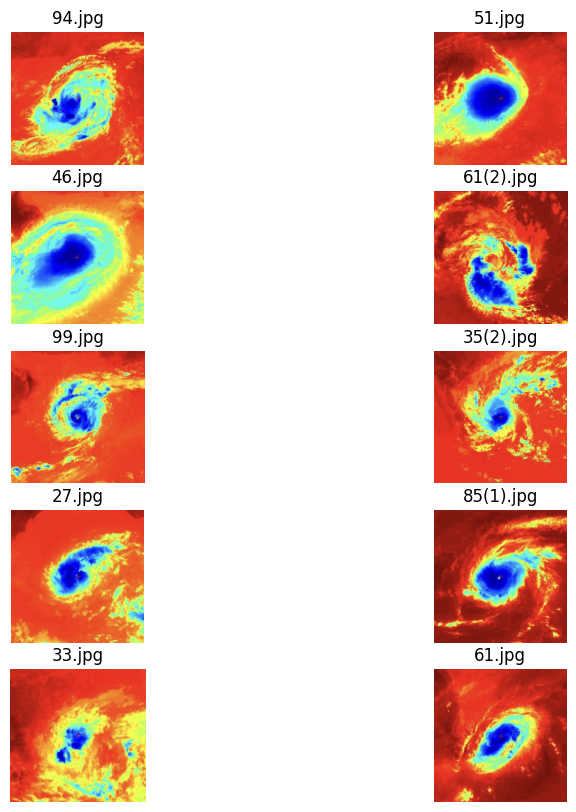

In [10]:
view_random_image("/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED")

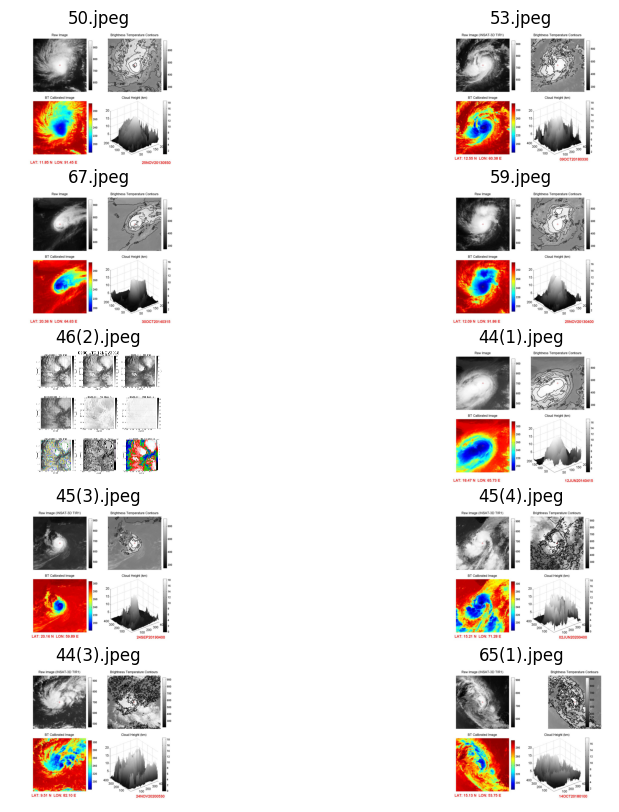

In [11]:
view_random_image("/content/insat3d_for_reference_ds/CYCLONE_DATASET")

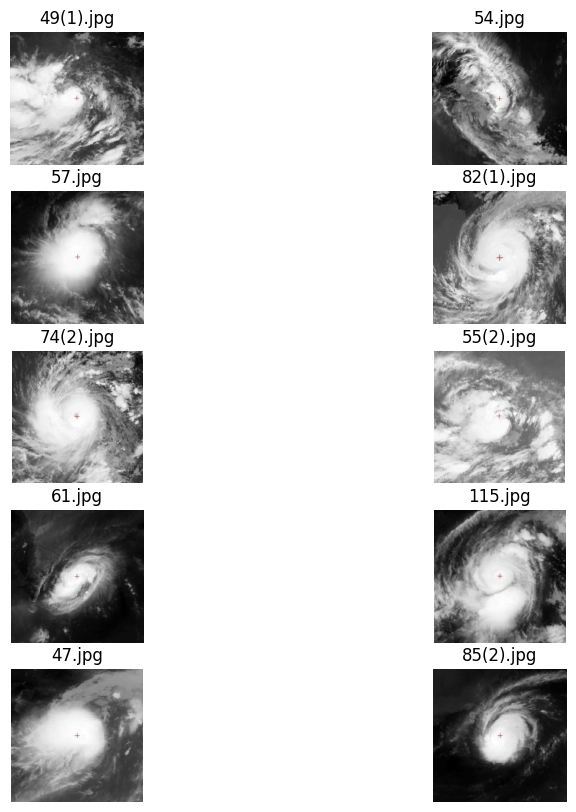

In [12]:
view_random_image("/content/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL")

#Preprocess the data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=pd.read_csv("/content/insat_3d_ds - Sheet.csv")

In [15]:
train_dir="/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED"
train_datagen=ImageDataGenerator(rescale=1./255)
train_data=train_datagen.flow_from_dataframe(train,train_dir,
                                             x_col='img_name',
                                             y_col="label",
                                             subset='training',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode="raw"
                                             )


Found 133 validated image filenames.


#Create a model

In [16]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Input
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
inputs=Input(shape=(256,256,3))
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(inputs)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(256,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(128,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(64,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y=Conv2D(32,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=Conv2D(16,3,activation=None, padding="same",kernel_initializer="he_normal",kernel_regularizer=regularizers.L1L2(0.01))(y)
y=tf.keras.layers.BatchNormalization()(y)
y=tf.keras.activations.relu(y)
y=MaxPool2D()(y)

y= Flatten()(y)
outputs=Dense(1,activation='linear')(y)
model_1=Model(inputs=inputs,outputs=outputs)

In [18]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 256)    1024      
 ormalization)                                                   
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 256, 256, 256)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 256)     590080    
                                                                 
 batch_normalization_1 (Batc  (None, 256, 256, 256)    1024      
 hNormalization)                                             

In [19]:
model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(lr=0.002),
                metrics=["mse"])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10,mode='min')

In [21]:
history_1=model_1.fit(train_data,
                      epochs=20,callbacks=[early_stopping])

Epoch 1/20
9/9 [==============================] - 15s 2s/step - loss: 3566.2095 - mse: 3080.6575
Epoch 2/20
9/9 [==============================] - 6s 682ms/step - loss: 2470.9285 - mse: 1983.0016
Epoch 3/20
9/9 [==============================] - 6s 684ms/step - loss: 1769.8433 - mse: 1280.7889
Epoch 4/20
9/9 [==============================] - 6s 684ms/step - loss: 1293.3560 - mse: 804.1328
Epoch 5/20
9/9 [==============================] - 6s 687ms/step - loss: 990.1931 - mse: 501.4196
Epoch 6/20
9/9 [==============================] - 6s 691ms/step - loss: 849.1783 - mse: 361.2689
Epoch 7/20
9/9 [==============================] - 6s 691ms/step - loss: 787.5385 - mse: 300.6272
Epoch 8/20
9/9 [==============================] - 6s 694ms/step - loss: 721.1063 - mse: 235.4234
Epoch 9/20
9/9 [==============================] - 6s 696ms/step - loss: 681.7227 - mse: 197.3014
Epoch 10/20
9/9 [==============================] - 6s 695ms/step - loss: 657.8541 - mse: 174.7984
Epoch 11/20
9/9 [=======

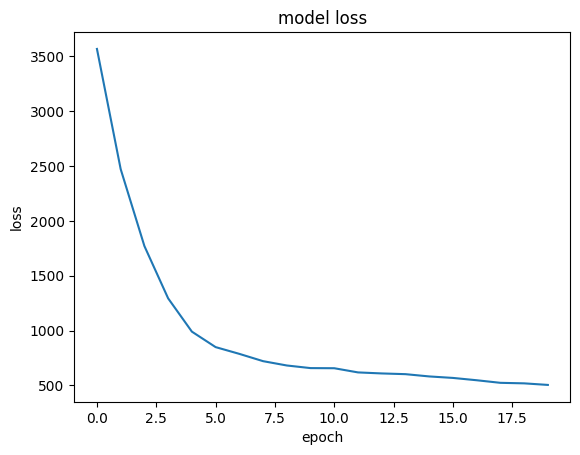

In [23]:
plt.plot(history_1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [24]:
def load_and_prep_image(filename, img_shape=256):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [25]:
def pred_and_plot(model, filename):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  
# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred}")
  plt.axis(False);

1/1 [==============================] - 1s 1s/step


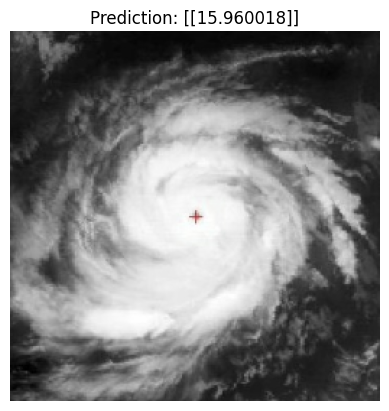

In [31]:
pred_and_plot(model_1,"/content/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL/101.jpg")

1/1 [==============================] - 0s 66ms/step


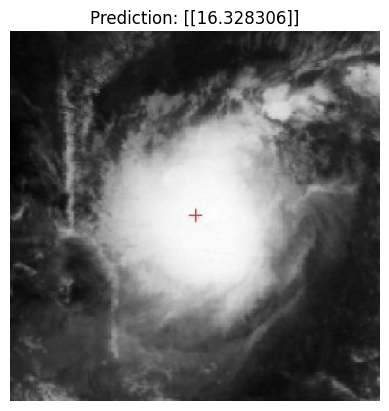

In [32]:
pred_and_plot(model_1,"/content/insat3d_raw_cyclone_ds/CYCLONE_DATASET_FINAL/111.jpg")

1/1 [==============================] - 0s 88ms/step


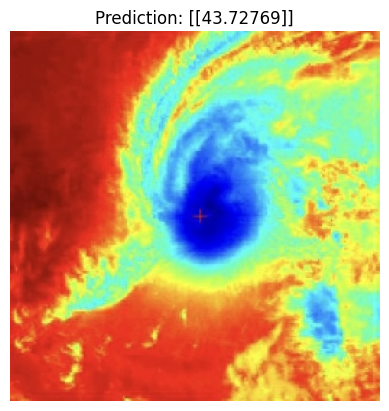

In [33]:
pred_and_plot(model_1,"/content/test_data/59(1).jpg")

1/1 [==============================] - 0s 21ms/step


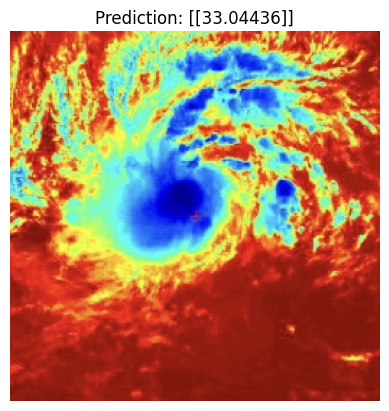

In [34]:
pred_and_plot(model_1,"/content/insat3d_ir_cyclone_ds/CYCLONE_DATASET_INFRARED/30(1).jpg")

In [36]:
import pickle
filename= "Trained_model.sav"
a=open(filename,'wb')
pickle.dump(model_1,a)
a.flush()
a.close()


In [30]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>